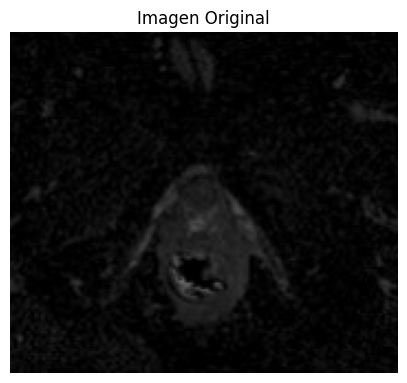

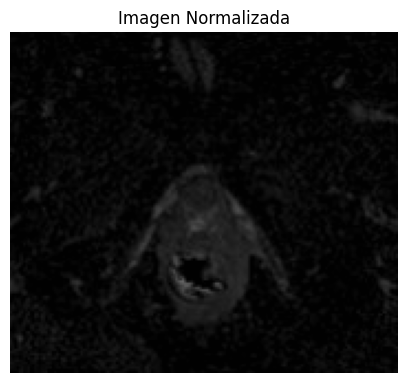

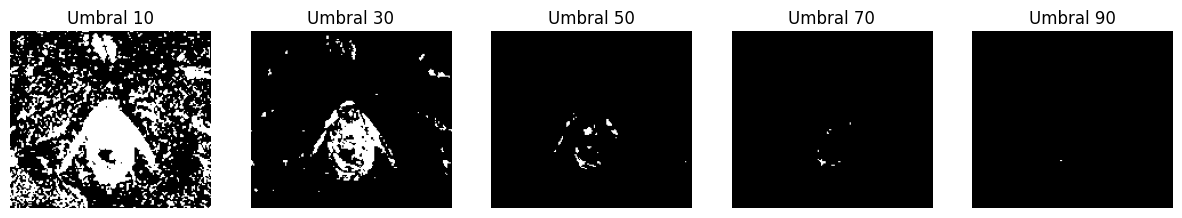

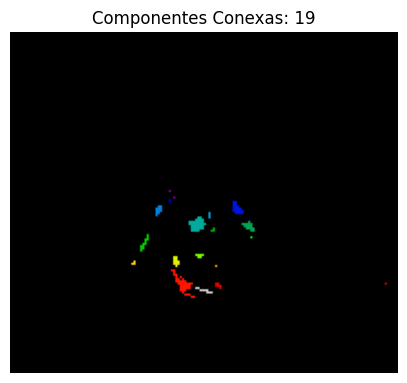

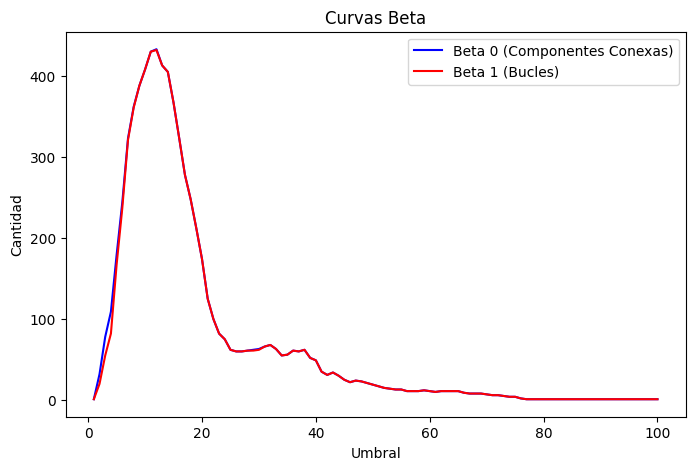

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import gudhi as gd

# Desactivar el uso de TeX en matplotlib para evitar el warning
plt.rcParams['text.usetex'] = False

# 📌 Función para cargar imágenes SIN convertir a escala de grises


def load_images_from_folder(folder_path):
    images = []
    file_names = []
    for file in os.listdir(folder_path):
        if file.endswith(".jpg") or file.endswith(".png"):
            img = cv2.imread(os.path.join(folder_path, file),
                             cv2.IMREAD_UNCHANGED)  # Carga imagen sin alterar
            if img is not None:
                images.append(img)
                file_names.append(file)
    return images, file_names

# 📌 Función para mostrar imágenes


def show_image(img, title="Imagen"):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 📌 Normalización de la imagen asegurando que esté en el rango 0-255


def normalize_image(img):
    img = img.astype(np.float32)  # Convertir a float para evitar errores
    min_val = np.min(img)
    max_val = np.max(img)

    # 📌 Evitar división por cero si la imagen ya está completamente homogénea
    if max_val == min_val:
        return np.ones_like(img) * 100

    normalized = 1 + (99 * (img - min_val) / (max_val - min_val))
    return normalized.astype(np.uint8)

# 📌 Binarización corregida asegurando un umbral adecuado


def binarize_image(img, threshold):
    binary_img = np.where(img < threshold, 0, 255).astype(np.uint8)
    # 📌 Asegurar que la imagen sea de 1 solo canal
    if len(binary_img.shape) > 2:
        binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
    return binary_img

# 📌 Detección de componentes conexas (SOLUCIÓN AL ERROR)


def detect_components(binary_img):
    # 📌 Asegurar que la imagen tiene solo 1 canal
    if len(binary_img.shape) > 2:
        binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
    # 📌 Asegurar que los valores sean np.uint8 (0 y 255)
    binary_img = binary_img.astype(np.uint8)
    num_labels, labels = cv2.connectedComponents(binary_img)
    return num_labels, labels

# 📌 Calcular curvas Beta


def compute_beta_curves(normalized_img):
    beta_0 = []
    beta_1 = []
    threshold_range = range(1, 101)

    for t in threshold_range:
        binary_img = binarize_image(normalized_img, t)
        num_components, _ = detect_components(binary_img)

        # 📌 Asegurar que la imagen binaria sea 1 canal antes de buscar contornos
        if len(binary_img.shape) > 2:
            binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)

        contours, _ = cv2.findContours(
            binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        num_loops = len(contours)

        beta_0_value = num_components - 1
        beta_1_value = num_loops

        # Verificación para evitar valores no finitos o cero
        if np.isfinite(beta_0_value) and np.isfinite(beta_1_value):
            beta_0.append(beta_0_value)
            beta_1.append(beta_1_value)
        else:
            beta_0.append(0)
            beta_1.append(0)

    return beta_0, beta_1

# 📌 Generar diagrama de persistencia


def compute_persistence(binary_img):
    rips_complex = gd.RipsComplex(points=np.argwhere(binary_img == 0))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()
    gd.plot_persistence_diagram(persistence)


# 📌 Carga de imágenes desde la carpeta
folder_path = "./img"
images, file_names = load_images_from_folder(folder_path)

# 📌 Mostrar la primera imagen cargada
if images:
    show_image(images[0], title="Imagen Original")

    # 📌 Normalizar la imagen asegurando que los valores estén en el rango correcto
    normalized_img = normalize_image(images[0])
    show_image(normalized_img, title="Imagen Normalizada")

    # 📌 Mostrar binarización con distintos umbrales
    thresholds = [10, 30, 50, 70, 90]
    fig, axes = plt.subplots(1, len(thresholds), figsize=(15, 5))

    for i, t in enumerate(thresholds):
        binary_img = binarize_image(normalized_img, t)
        axes[i].imshow(binary_img, cmap='gray')
        axes[i].set_title(f'Umbral {t}')
        axes[i].axis('off')

    plt.show()

    # 📌 Detectar componentes conexas en umbral 50
    binary_img_50 = binarize_image(normalized_img, 50)
    num_components, labeled_img = detect_components(binary_img_50)

    plt.figure(figsize=(5, 5))
    plt.imshow(labeled_img, cmap='nipy_spectral')
    plt.title(f'Componentes Conexas: {num_components - 1}')
    plt.axis('off')
    plt.show()

    # 📌 Calcular curvas Beta
    beta_0, beta_1 = compute_beta_curves(normalized_img)

    # 📌 Graficar curvas Beta
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 101), beta_0,
             label="Beta 0 (Componentes Conexas)", color='b')
    plt.plot(range(1, 101), beta_1, label="Beta 1 (Bucles)", color='r')
    plt.xlabel("Umbral")
    plt.ylabel("Cantidad")
    plt.legend()
    plt.title("Curvas Beta")
    plt.show()

    # 📌 Generar diagrama de persistencia
    compute_persistence(binary_img_50)

else:
    print("No se encontraron imágenes en la carpeta.")

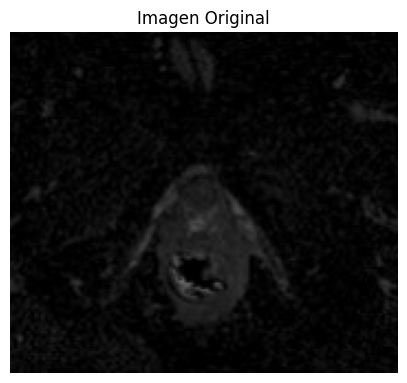

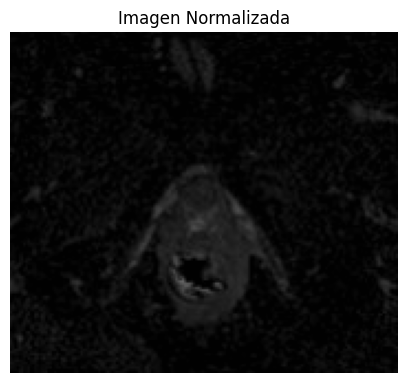

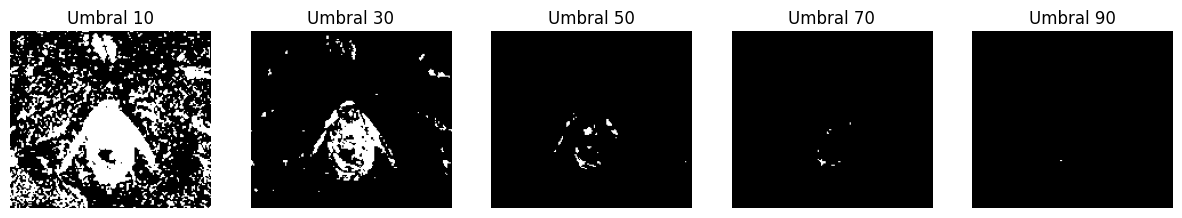

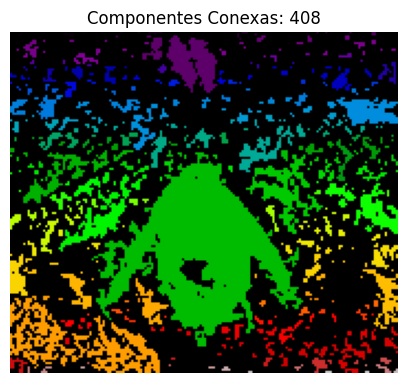

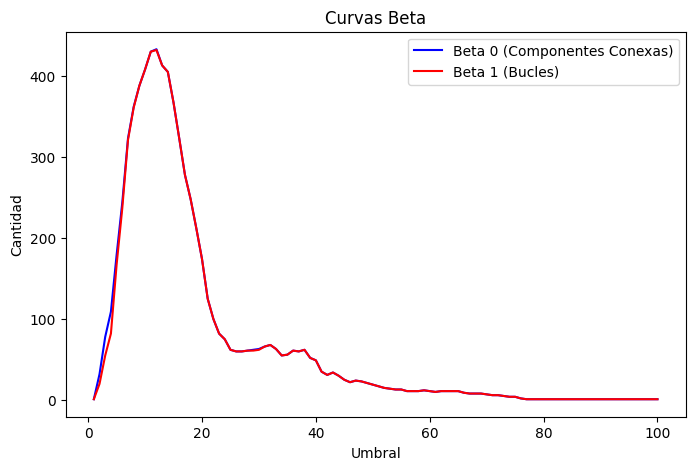

c:\Users\lruizap\Desktop\Clases\Diego\.venv\Lib\site-packages\gudhi\persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


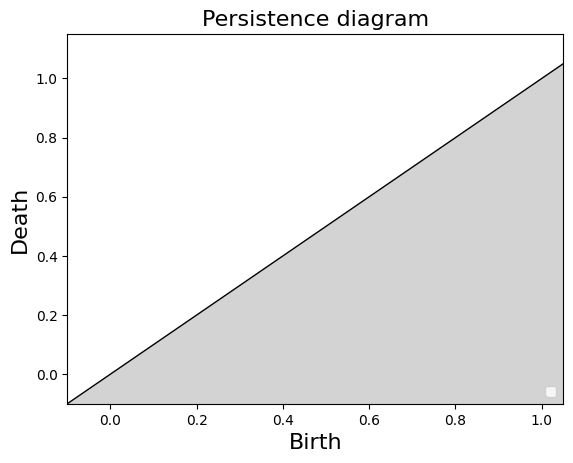

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import gudhi as gd

# Desactivar el uso de TeX en matplotlib para evitar el warning
plt.rcParams['text.usetex'] = False

# 📌 Función para cargar imágenes SIN convertir a escala de grises


def load_images_from_folder(folder_path):
    images = []
    file_names = []
    for file in os.listdir(folder_path):
        if file.endswith(".jpg") or file.endswith(".png"):
            img = cv2.imread(os.path.join(folder_path, file),
                             cv2.IMREAD_UNCHANGED)  # Carga imagen sin alterar
            if img is not None:
                images.append(img)
                file_names.append(file)
    return images, file_names

# 📌 Función para mostrar imágenes


def show_image(img, title="Imagen"):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 📌 Normalización de la imagen asegurando que esté en el rango 0-255


def normalize_image(img):
    img = img.astype(np.float32)  # Convertir a float para evitar errores
    min_val = np.min(img)
    max_val = np.max(img)

    # 📌 Evitar división por cero si la imagen ya está completamente homogénea
    if max_val == min_val:
        return np.ones_like(img) * 100

    normalized = 1 + (99 * (img - min_val) / (max_val - min_val))
    return normalized.astype(np.uint8)

# 📌 Binarización corregida asegurando un umbral adecuado


def binarize_image(img, threshold):
    binary_img = np.where(img < threshold, 0, 255).astype(np.uint8)
    # 📌 Asegurar que la imagen sea de 1 solo canal
    if len(binary_img.shape) > 2:
        binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
    return binary_img

# 📌 Detección de componentes conexas (SOLUCIÓN AL ERROR)


def detect_components(binary_img):
    # 📌 Asegurar que la imagen tiene solo 1 canal
    if len(binary_img.shape) > 2:
        binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
    # 📌 Asegurar que los valores sean np.uint8 (0 y 255)
    binary_img = binary_img.astype(np.uint8)
    num_labels, labels = cv2.connectedComponents(binary_img)
    return num_labels, labels

# 📌 Reducción de tamaño de la imagen


def downscale_image(img, scale_factor=0.1):
    width = int(img.shape[1] * scale_factor)
    height = int(img.shape[0] * scale_factor)
    dim = (width, height)
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

# 📌 Función para calcular la persistencia


def compute_persistence(binary_img):
    # Reducción de tamaño antes de calcular la persistencia
    # Reducir la imagen a un 10% de su tamaño original
    reduced_img = downscale_image(binary_img, scale_factor=0.1)

    # 📌 Obtener las posiciones de los puntos 0 en la imagen binaria
    points = np.argwhere(reduced_img == 0)

    # 📌 Crear el complejo de Rips con puntos reducidos
    rips_complex = gd.RipsComplex(points=points)

    # 📌 Crear el árbol de simplices con dimensión máxima 1
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    persistence = simplex_tree.persistence()

    # 📌 Mostrar el diagrama de persistencia
    gd.plot_persistence_diagram(persistence)


# 📌 Carga de imágenes desde la carpeta
folder_path = "./img"
images, file_names = load_images_from_folder(folder_path)

# 📌 Mostrar la primera imagen cargada
if images:
    show_image(images[0], title="Imagen Original")

    # 📌 Normalizar la imagen asegurando que los valores estén en el rango correcto
    normalized_img = normalize_image(images[0])
    show_image(normalized_img, title="Imagen Normalizada")

    # 📌 Mostrar binarización con distintos umbrales
    thresholds = [10, 30, 50, 70, 90]
    fig, axes = plt.subplots(1, len(thresholds), figsize=(15, 5))

    for i, t in enumerate(thresholds):
        binary_img = binarize_image(normalized_img, t)
        axes[i].imshow(binary_img, cmap='gray')
        axes[i].set_title(f'Umbral {t}')
        axes[i].axis('off')

    plt.show()

    # 📌 Detectar componentes conexas en umbral 50
    binary_img_50 = binarize_image(normalized_img, 10)
    num_components, labeled_img = detect_components(binary_img_50)

    plt.figure(figsize=(5, 5))
    plt.imshow(labeled_img, cmap='nipy_spectral')
    plt.title(f'Componentes Conexas: {num_components - 1}')
    plt.axis('off')
    plt.show()

    # 📌 Calcular curvas Beta
    beta_0 = []
    beta_1 = []
    threshold_range = range(1, 101)

    for t in threshold_range:
        binary_img = binarize_image(normalized_img, t)
        num_components, _ = detect_components(binary_img)

        # 📌 Asegurar que la imagen binaria sea 1 canal antes de buscar contornos
        if len(binary_img.shape) > 2:
            binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)

        contours, _ = cv2.findContours(
            binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        num_loops = len(contours)

        beta_0.append(num_components - 1)
        beta_1.append(num_loops)

    # 📌 Graficar curvas Beta
    plt.figure(figsize=(8, 5))
    plt.plot(threshold_range, beta_0,
             label="Beta 0 (Componentes Conexas)", color='b')
    plt.plot(threshold_range, beta_1, label="Beta 1 (Bucles)", color='r')
    plt.xlabel("Umbral")
    plt.ylabel("Cantidad")
    plt.legend()
    plt.title("Curvas Beta")
    plt.show()

    # 📌 Generar diagrama de persistencia
    compute_persistence(binary_img_50)

else:
    print("No se encontraron imágenes en la carpeta.")

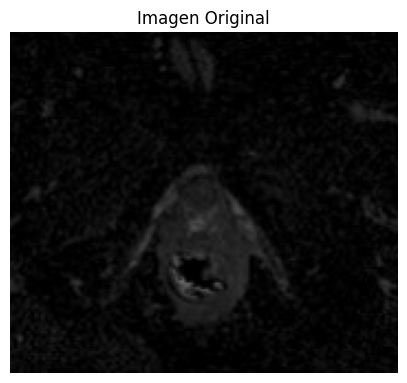

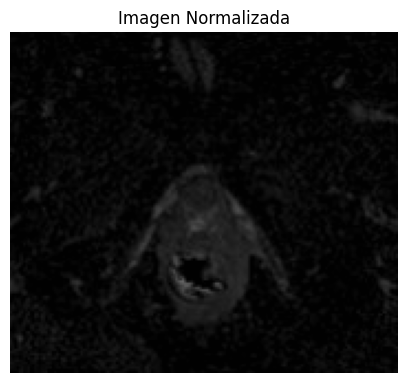

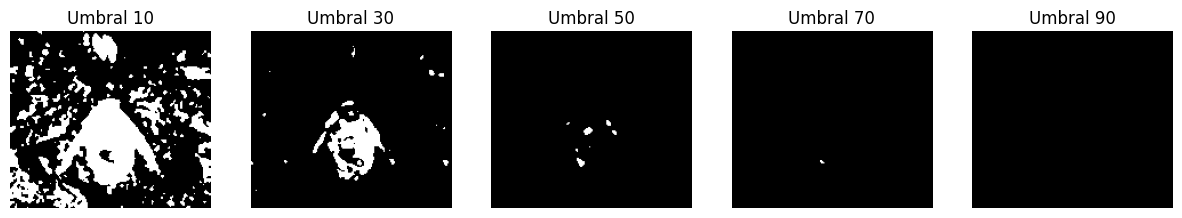

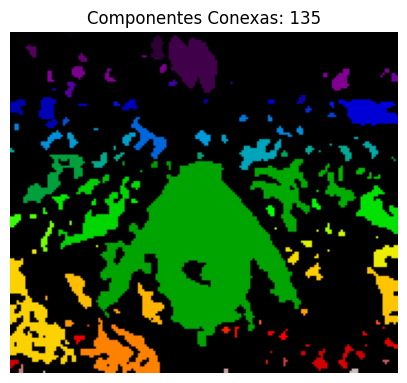

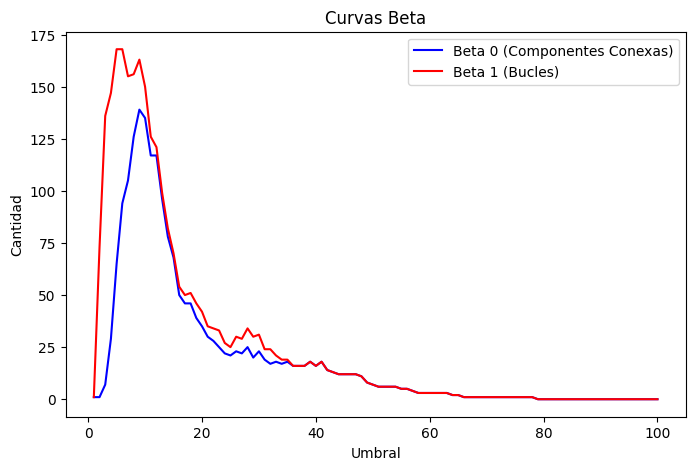

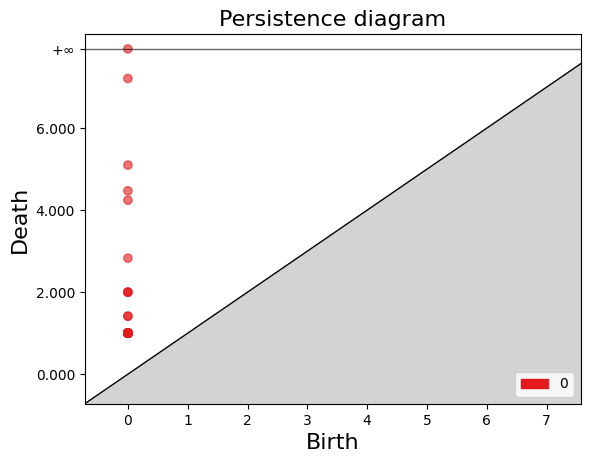

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import gudhi as gd

# Desactivar el uso de TeX en matplotlib para evitar el warning
plt.rcParams['text.usetex'] = False

# 📌 Función para cargar imágenes SIN convertir a escala de grises


def load_images_from_folder(folder_path):
    images = []
    file_names = []
    for file in os.listdir(folder_path):
        if file.endswith(".jpg") or file.endswith(".png"):
            img = cv2.imread(os.path.join(folder_path, file),
                             cv2.IMREAD_UNCHANGED)  # Carga imagen sin alterar
            if img is not None:
                images.append(img)
                file_names.append(file)
    return images, file_names

# 📌 Función para mostrar imágenes


def show_image(img, title="Imagen"):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 📌 Normalización de la imagen asegurando que esté en el rango 0-255


def normalize_image(img):
    img = img.astype(np.float32)  # Convertir a float para evitar errores
    min_val = np.min(img)
    max_val = np.max(img)

    # 📌 Evitar división por cero si la imagen ya está completamente homogénea
    if max_val == min_val:
        return np.ones_like(img) * 100

    normalized = 1 + (99 * (img - min_val) / (max_val - min_val))
    return normalized.astype(np.uint8)

# 📌 Binarización corregida asegurando un umbral adecuado


def binarize_image(img, threshold):
    binary_img = np.where(img < threshold, 0, 255).astype(np.uint8)
    # 📌 Asegurar que la imagen sea de 1 solo canal
    if len(binary_img.shape) > 2:
        binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
    return binary_img

# 📌 Detección de componentes conexas


def detect_components(binary_img):
    # 📌 Asegurar que la imagen tiene solo 1 canal
    if len(binary_img.shape) > 2:
        binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
    # 📌 Asegurar que los valores sean np.uint8 (0 y 255)
    binary_img = binary_img.astype(np.uint8)
    num_labels, labels = cv2.connectedComponents(binary_img)
    return num_labels, labels

# 📌 Reducción de tamaño de la imagen


def downscale_image(img, scale_factor=0.1):
    width = int(img.shape[1] * scale_factor)
    height = int(img.shape[0] * scale_factor)
    dim = (width, height)
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

# 📌 Función para calcular la persistencia


def compute_persistence(binary_img):
    # Reducción de tamaño antes de calcular la persistencia
    # Reducir la imagen a un 10% de su tamaño original
    reduced_img = downscale_image(binary_img, scale_factor=0.1)

    # 📌 Obtener las posiciones de los puntos 0 en la imagen binaria
    points = np.argwhere(reduced_img == 0)

    # 📌 Crear el complejo de Rips con puntos reducidos
    rips_complex = gd.RipsComplex(points=points)

    # 📌 Crear el árbol de simplices con dimensión máxima 1
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    persistence = simplex_tree.persistence()

    # 📌 Mostrar el diagrama de persistencia
    gd.plot_persistence_diagram(persistence)


# 📌 Carga de imágenes desde la carpeta
folder_path = "./img"
images, file_names = load_images_from_folder(folder_path)

# 📌 Mostrar la primera imagen cargada
if images:
    show_image(images[0], title="Imagen Original")

    # 📌 Normalizar la imagen asegurando que los valores estén en el rango correcto
    normalized_img = normalize_image(images[0])
    show_image(normalized_img, title="Imagen Normalizada")

    # 📌 Suavizar la imagen antes de binarizarla
    smoothed_img = cv2.GaussianBlur(normalized_img, (5, 5), 0)

    # 📌 Mostrar binarización con distintos umbrales
    thresholds = [10, 30, 50, 70, 90]
    fig, axes = plt.subplots(1, len(thresholds), figsize=(15, 5))

    for i, t in enumerate(thresholds):
        binary_img = binarize_image(smoothed_img, t)
        axes[i].imshow(binary_img, cmap='gray')
        axes[i].set_title(f'Umbral {t}')
        axes[i].axis('off')

    plt.show()

    # 📌 Detectar componentes conexas en umbral 50
    binary_img_50 = binarize_image(smoothed_img, 10)
    num_components, labeled_img = detect_components(binary_img_50)

    plt.figure(figsize=(5, 5))
    plt.imshow(labeled_img, cmap='nipy_spectral')
    plt.title(f'Componentes Conexas: {num_components - 1}')
    plt.axis('off')
    plt.show()

    # 📌 Calcular curvas Beta
    beta_0 = []
    beta_1 = []
    threshold_range = range(1, 101)

    for t in threshold_range:
        binary_img = binarize_image(smoothed_img, t)
        num_components, _ = detect_components(binary_img)

        # 📌 Asegurar que la imagen binaria sea 1 canal antes de buscar contornos
        if len(binary_img.shape) > 2:
            binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)

        contours, _ = cv2.findContours(
            binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        num_loops = len(contours)

        beta_0.append(num_components - 1)
        beta_1.append(num_loops)

    # 📌 Graficar curvas Beta
    plt.figure(figsize=(8, 5))
    plt.plot(threshold_range, beta_0,
             label="Beta 0 (Componentes Conexas)", color='b')
    plt.plot(threshold_range, beta_1, label="Beta 1 (Bucles)", color='r')
    plt.xlabel("Umbral")
    plt.ylabel("Cantidad")
    plt.legend()
    plt.title("Curvas Beta")
    plt.show()

    # 📌 Generar diagrama de persistencia
    compute_persistence(binary_img_50)

else:
    print("No se encontraron imágenes en la carpeta.")